<a href="https://colab.research.google.com/github/Aditya8215/Deep-Learning-Practice/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convert to Image

In [339]:
import struct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [340]:
def load_images(file_path):
    with open(file_path, 'rb') as f:
        # Read the metadata
        magic, num, rows, cols = struct.unpack('>IIII', f.read(16))
        # Read the image data
        image_data = np.frombuffer(f.read(), dtype=np.uint8)
        # Reshape into [num_images, rows, cols]
        images = image_data.reshape((num, rows, cols))
        return images

In [341]:
train_images=load_images('/content/train-images-idx3-ubyte')
print(train_images.shape)
test_images=load_images('/content/t10k-images-idx3-ubyte')
print(test_images.shape)
x_train=train_images
x_test=test_images

(60000, 28, 28)
(10000, 28, 28)


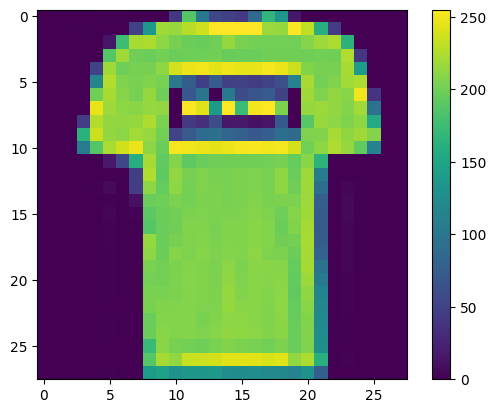

In [343]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [347]:
def load_labels(file_path):
    with open(file_path, 'rb') as f:
        magic, num = struct.unpack('>II', f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
        return labels


In [348]:
train_labels=load_labels('/content/train-labels-idx1-ubyte')
print(train_labels)
test_labels=load_labels('/content/t10k-labels-idx1-ubyte')
print(test_labels)
y_train=train_labels
y_test=test_labels

[9 0 0 ... 3 0 5]
[9 2 1 ... 8 1 5]


Preprocess the Data for TensorFlow

TensorFlow models require:

Float input

Normalized data

Correct shape for ANN: (num_samples, 784)

(Optional) One-hot labels for categorical crossentropy

In [349]:
# Normalize the data so that it ranges (0-1) instead of (0-255)-- result in faster convergence
x_train=train_images.astype('float32')/255.0
x_test=test_images.astype('float32')/255.0

In [350]:
# Flatten from (28,28) to (784) for ANN
# (w^T *x+b ) the x input vector should be in 1d vector
x_train=x_train.reshape(-1,28*28)
x_test=x_test.reshape(-1,28*28)

Combining into DataFrame

In [351]:
combined=np.hstack((x_train,y_train.reshape(-1,1)))
df=pd.DataFrame(combined)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,9.0
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [352]:
combined1=np.hstack((x_test,y_test.reshape(-1,1)))
df1=pd.DataFrame(combined1)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,9.0
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.011765,0.0,0.011765,0.682353,0.741176,0.262745,0.0,0.0,0.0,2.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.003922,0.000000,...,0.227451,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.082353,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.007843,0.0,0.003922,0.003922,0.0,0.000000,0.000000,...,0.047059,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,6.0


In [353]:
df.isnull().sum().max(),df1.isnull().sum().max()

(0, 0)

In [354]:
df.duplicated().sum(),df1.duplicated().sum()

(np.int64(0), np.int64(0))

Training the ANN

In [355]:
x_train,y_train

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([9, 0, 0, ..., 3, 0, 5], dtype=uint8))

In [356]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [357]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout

In [322]:
model=Sequential()

model.add(Dense(1024,activation='relu',input_shape=(784,)))
model.add(Dropout(0.4))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [323]:
model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_92 (Dense)                │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,503,530 (5.74 MB)

 Trainable params: 1,503,530 (5.74 MB)

 Non-trainable params: 0 (0.00 B)

In [324]:
optimizer=keras.optimizers.Adam(learning_rate=0.001)

In [325]:
model.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=['accuracy'])

In [326]:
from tensorflow.keras.callbacks import LearningRateScheduler,EarlyStopping

# Define warm-up scheduler function
def warmup_scheduler(epoch):
    if epoch < 3:  # First 3 epochs = warm-up
        return 1e-4 + (epoch * 2e-4)  # Gradually increase LR
    else:
        return 1e-3  # After warm-up, use stable learning rate

# Add to callback
lr_callback = LearningRateScheduler(warmup_scheduler)


In [331]:
callback=EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
)

In [332]:
history=model.fit(x_train,y_train,epochs=30,batch_size=512,verbose=1,validation_data=(x_test,y_test),callbacks=[lr_callback,callback])

Epoch 1/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 15s 124ms/step - accuracy: 0.8946 - loss: 0.3083 - val_accuracy: 0.8903 - val_loss: 0.3190 - learning_rate: 1.0000e-04
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 18s 106ms/step - accuracy: 0.8989 - loss: 0.2949 - val_accuracy: 0.8893 - val_loss: 0.3254 - learning_rate: 3.0000e-04
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 110ms/step - accuracy: 0.8968 - loss: 0.2944 - val_accuracy: 0.8895 - val_loss: 0.3237 - learning_rate: 5.0000e-04
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - accuracy: 0.8906 - loss: 0.3096 - val_accuracy: 0.8746 - val_loss: 0.3473 - learning_rate: 0.0010
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 12s 105ms/step - accuracy: 0.8872 - loss: 0.3232 - val_accuracy: 0.8811 - val_loss: 0.3329 - learning_rate: 0.0010
Epoch 6/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 12s 105ms/step - accuracy: 0.8867 - loss: 0.3177 - val_accuracy: 0.8839 - val_loss: 0.3407 - learning_rate: 0.0010
Epoch 7/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - a

#Chechking The accuracy

In [333]:
test_loss,test_acc=model.evaluate(x_test,y_test)
test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8875 - loss: 0.3290


0.8891000151634216

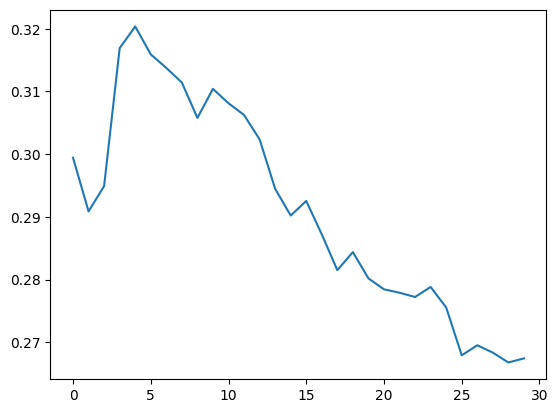

In [334]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])


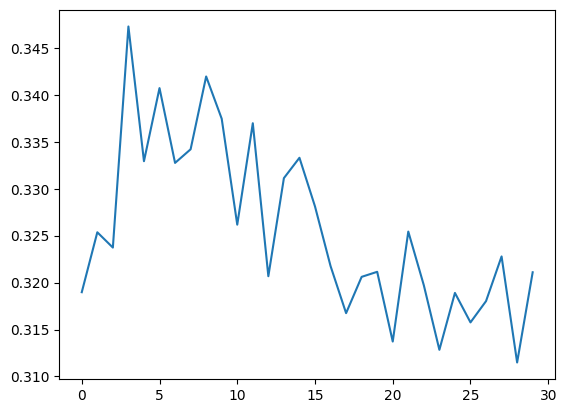

In [335]:
plt.plot(history.history['val_loss'])

In [364]:
y_pred = model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


array([9, 2, 1, ..., 8, 1, 5])

In [365]:
for i in range(0,10):
    print(y_pred[i], y_test[i])

9 9
2 2
1 1
1 1
6 6
1 1
4 4
6 6
5 5
7 7


In [366]:
from sklearn.metrics import confusion_matrix, accuracy_score
cn = confusion_matrix(y_test, y_pred)
print(cn)

[[838   1  13  20   2   2 119   0   5   0]
 [  2 967   1  23   4   0   2   0   1   0]
 [ 13   0 816   7  95   0  69   0   0   0]
 [ 22   3   8 892  44   0  29   0   2   0]
 [  0   0 102  18 813   0  66   0   1   0]
 [  0   0   0   0   0 959   0  19   0  22]
 [118   0  81  25  64   0 710   0   2   0]
 [  0   0   0   0   0   9   0 981   0  10]
 [  2   0   1   6   2   1  13   4 971   0]
 [  0   0   0   0   0   6   1  49   0 944]]
